# Zestaw 2

## Zadanie 1

Stany serwera: \
    0 -> użytkownicy niezalogowani \
    1 -> jeden zalogowany użytkownik \
    2 -> dwóch zalogowanych użytkowników

In [1]:
import numpy as np

p00=0.8*0.8
p01=0.8*0.2+0.2*0.8
p02=0.2*0.2
p10=0.8*0.5
p11=0.2*0.5+0.8*0.5
p12=0.2*0.5
p20=0.5*0.5
p21=0.5*0.5*2
p22=0.5*0.5

P = np.array([[p00, p01, p02], [p10, p11, p12], [p20, p21, p22]])
print(P)

[[0.64 0.32 0.04]
 [0.4  0.5  0.1 ]
 [0.25 0.5  0.25]]


## Zadanie 2

In [2]:
from matplotlib import pyplot as plt

def diagonala(P_n):
    diag = []
    for i in range(len(P_n)):
        for j in range(len(P_n)):
            if(i == j):
                diag.append(P_n[i][j])
    return diag


In [3]:
n = 3
print(np.linalg.matrix_power(P, n))

[[0.521284 0.401432 0.077284]
 [0.50179  0.41342  0.08479 ]
 [0.483025 0.42395  0.093025]]


In [4]:
n_ = 2
P_o = P
P_n = P @ P
diagonala_n = [diagonala(P_n)]
while(not np.all(abs(P_n - P_o) < 1e-5)):
    P_o = P_n
    P_n = P_n @ P
    n_+=1
    diagonala_n.append(diagonala(P_n))
print(n_)
print(P_n)

11
[[0.5102048  0.40816283 0.08163236]
 [0.51020354 0.40816359 0.08163287]
 [0.51020227 0.40816435 0.08163338]]


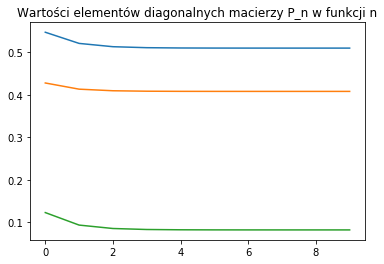

In [5]:
plt.plot(diagonala_n)
plt.title("Wartości elementów diagonalnych macierzy P_n w funkcji n")
plt.show()

In [6]:
print("Macierz P_n_:")
print(P_n)

Macierz P_n_:
[[0.5102048  0.40816283 0.08163236]
 [0.51020354 0.40816359 0.08163287]
 [0.51020227 0.40816435 0.08163338]]


In [7]:
print("P00: {}, \tP01: {}, \tP02: {}".format(*P_n[0]))
print("Π0: 0.5102, \t\t\tΠ1: 0.4082, \t\t\tΠ2: 0.0816")

P00: 0.5102048046818896, 	P01: 0.40816283147622284, 	P02: 0.08163236384188893
Π0: 0.5102, 			Π1: 0.4082, 			Π2: 0.0816


## Zadanie 3

In [8]:
n_epoch = 10000
stan = [0, 1, 2]
p_zal = 0.2
p_wyl = 0.5
x_end = dict.fromkeys(stan)
for s in stan:
    x = s
    x_end[s] = []
    for i in range(n_epoch):
        for j in range(n_):
            u = np.random.uniform()
            stan_docelowy = 0
            while(u > P[x, stan_docelowy]):
                u -= P[x, stan_docelowy]
                stan_docelowy += 1
            x = stan_docelowy
        x_end[s].append(x)

In [9]:
for s in stan:
    x0 = np.sum(np.array(x_end[s]) == 0)
    x1 = np.sum(np.array(x_end[s]) == 1)
    x2 = np.sum(np.array(x_end[s]) == 2)
    pi0 = x0/n_epoch
    pi1 = x1/n_epoch
    pi2 = x2/n_epoch
    print("Stan początkowy: s = {}".format(s))
    print("Dla i = 0: Π = {}".format(x0/n_epoch))
    print("Dla i = 1: Π = {}".format(x1/n_epoch))
    print("Dla i = 2: Π = {}".format(x2/n_epoch))

Stan początkowy: s = 0
Dla i = 0: Π = 0.5072
Dla i = 1: Π = 0.411
Dla i = 2: Π = 0.0818
Stan początkowy: s = 1
Dla i = 0: Π = 0.5068
Dla i = 1: Π = 0.4114
Dla i = 2: Π = 0.0818
Stan początkowy: s = 2
Dla i = 0: Π = 0.5067
Dla i = 1: Π = 0.4084
Dla i = 2: Π = 0.0849


## Zadanie 4

In [10]:
p_zal = 0.2
p_wyl = 0.5

In [11]:
import math

def comb(n, k):
    num = math.factorial(n)
    denom = math.factorial(k) * math.factorial(n-k)
    return int(num / denom)

In [12]:
def macierz_przejscia(n, p_zal, p_wyl):
    P = np.zeros([n+1, n+1])
    for i in range(n+1):
        for j in range(n+1):
            if i < j:
                start = range(j-i, min(j+1, n-i+1))
                stop = range(0, i+1)
            else:
                start = range(0, j+1)
                stop = range(i-j, min(i+1, n-j+1))
            
            Actions = list(zip(start, stop))
            P[i][j] = sum( [  comb(n-i, a_zal)  * p_zal**a_zal   * (1-p_zal)**(n-i-a_zal)  \
                            * comb(i,   a_wyl) * p_wyl**a_wyl * (1-p_wyl)**(i-a_wyl)  \
                          for (a_zal, a_wyl) in Actions])
            
    assert np.allclose(P.sum(axis=1), 1)
    return P

In [13]:
P = macierz_przejscia(100, 0.2, 0.5)
n_ = 2
P_o = P
P_n = P @ P
diagonala_n = [diagonala(P_n)]
while(not np.all(abs(P_n - P_o) < 1e-5)):
    P_o = P_n
    P_n = P_n @ P
    n_+=1
    diagonala_n.append(diagonala(P_n))
print(n_)
print(P_n)

P_n.sum(axis=1)

11
[[2.43908652e-15 9.75632188e-14 1.93174694e-12 ... 1.21228854e-50
  9.79624677e-53 3.91848899e-55]
 [2.43908047e-15 9.75629853e-14 1.93174249e-12 ... 1.21229585e-50
  9.79630666e-53 3.91851329e-55]
 [2.43907442e-15 9.75627518e-14 1.93173803e-12 ... 1.21230316e-50
  9.79636655e-53 3.91853758e-55]
 ...
 [2.43849378e-15 9.75403391e-14 1.93131035e-12 ... 1.21300473e-50
  9.80211753e-53 3.92087064e-55]
 [2.43848773e-15 9.75401056e-14 1.93130590e-12 ... 1.21301204e-50
  9.80217745e-53 3.92089495e-55]
 [2.43848169e-15 9.75398722e-14 1.93130144e-12 ... 1.21301935e-50
  9.80223738e-53 3.92091926e-55]]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

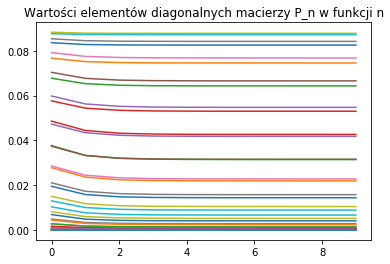

In [14]:
plt.plot(diagonala_n)
plt.title("Wartości elementów diagonalnych macierzy P_n w funkcji n")
plt.show()

## Zadanie 5

In [15]:
n_epoch = 10000
stan = list(range(100+1))
p_zal = 0.2
p_wyl = 0.5
x_end = dict.fromkeys(stan)
for s in stan:
    x = s
    x_end[s] = []
    for i in range(n_epoch):
        for j in range(n_):
            u = np.random.uniform()
            stan_docelowy = 0
            while(u > P[x, stan_docelowy]):
                u -= P[x, stan_docelowy]
                stan_docelowy += 1
            x = stan_docelowy
        x_end[s].append(x)

In [20]:
pi = dict.fromkeys(stan)
for s in stan:
    pi[s] = []
    for i in range(100):
        n_i = np.sum(np.array(x_end[s]) == i)
        pi[s].append(n_i/n_epoch)

In [21]:
for s in stan:
    print(np.sum(pi[s]))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
